# Intro al ML y IA
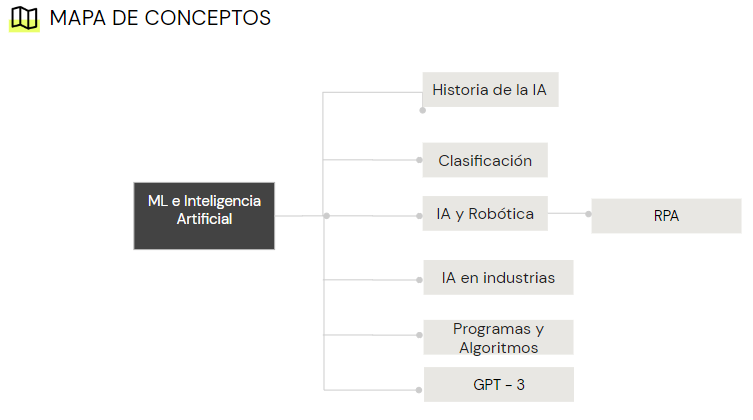

## Típos de IA
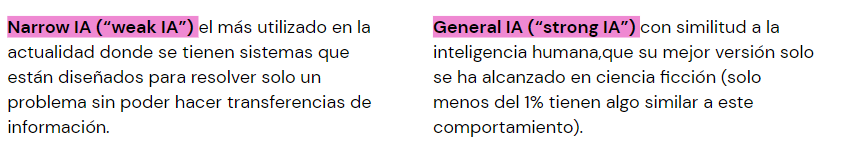
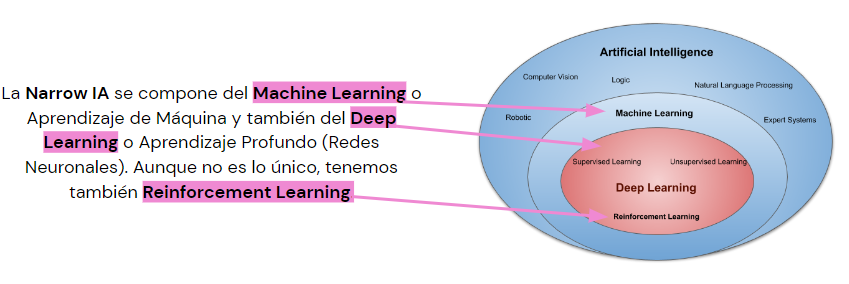
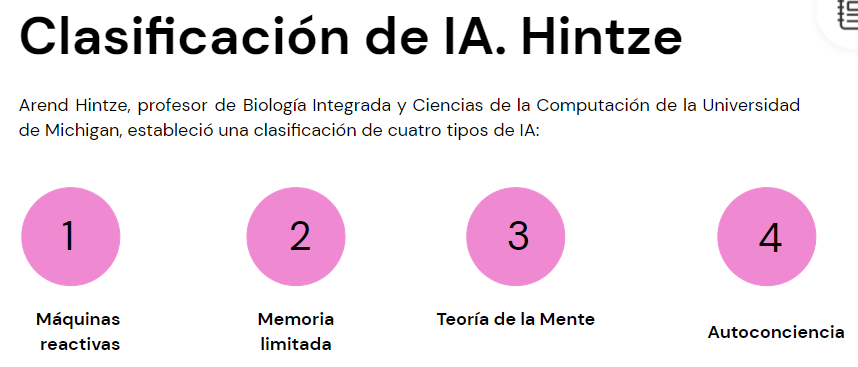

# EJEMPLO
Pequeño asistente virtual

Texto -> Audio

In [1]:
from gtts import gTTS
from IPython.display import Audio

In [4]:
tts = gTTS('Hola! Buenos días!', lang='es')
tts.save('archivos/1.wav')

In [5]:
sound_file = 'archivos/1.wav'
Audio(sound_file, autoplay=True)

# Algoritmos y validación de Modelos de ML
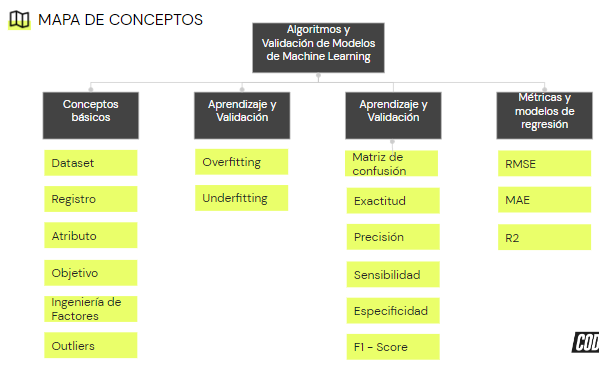

## Conceptos básicos
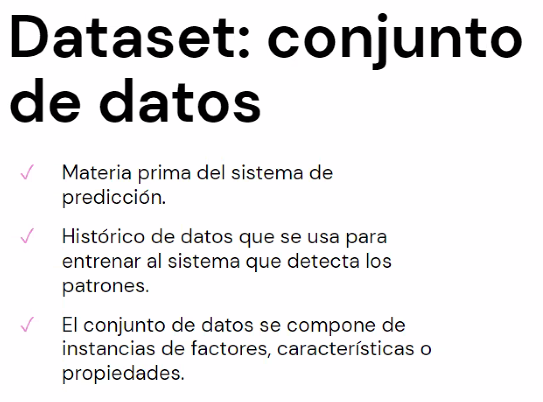
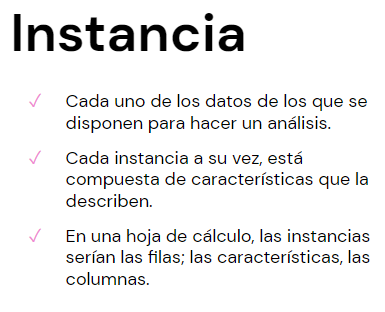
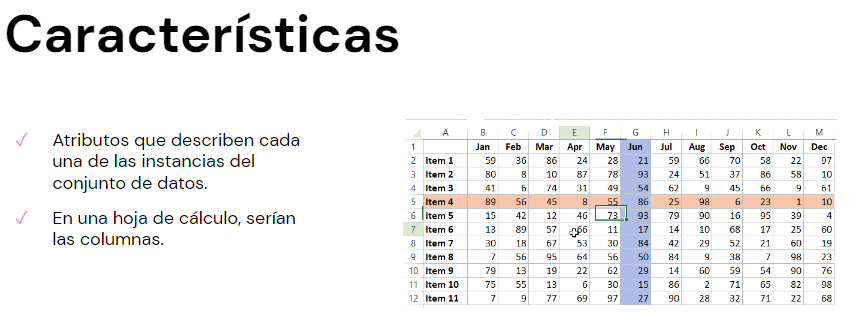
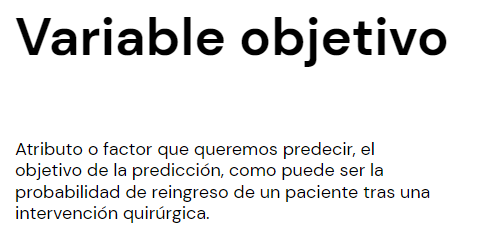

## Ingeniería de factores (Feature engineering)
* Proceso previo a la creación del modelo en el que se hace análisis, limpieza y estructuración de los datos. 
* El objetivo es eliminar los campos que no sirven para hacer la predicción y organizarlos adecuadamente para que el modelo no reciba información que no le es útil y que podría provocar predicciones de poca calidad o confianza. 

### Datos perdidos
* Es muy habitual encontrarnos con valores perdidos en estos procesos.
* **Pueden aparecer de distintas formas**: como un signo de interrogación, o N/A, como un 0 o simplemente como una celda en blanco, pero en su mayoría nos lo encontramos representado como NaN que se refiere a “no un número”.

### Outliers - Valores extremos
Valor que no se corresponde con el patrón general de nuestros datos. Puede ser bueno, malo o simplemente un error de datos pero en todos esos casos tenemos que realizar un análisis.
#### Importancia de tratar los outliers
En términos generales, tratar los outliers suele mejorar los modelos de ML. 
Muchos modelos avanzados son sensibles a los valores extremos y además, siempre es preferible realizar una buena preparación de datos antes que complejizar los modelos.

### Validación
* **Proceso de evaluar un modelo entrenado sobre un conjunto de datos de prueba.** Esto proporciona la capacidad de generalización de un modelo de ML. 
* Para poder evaluarlo correctamente, hay que realizar “split de datos” es decir, separar nuestro dataset original en **“Datos de Entrenamiento”**, que serán usados justamente para entrenar a nuestro modelo y en **“Datos de Test o de Testing”** que serán aquellos datos que utilizaremos para evaluar la performance de nuestro modelo.

Se suele utilizar un 70% de los datos para el training y un 30% para el testing.
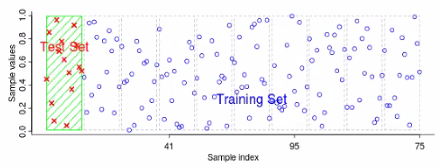

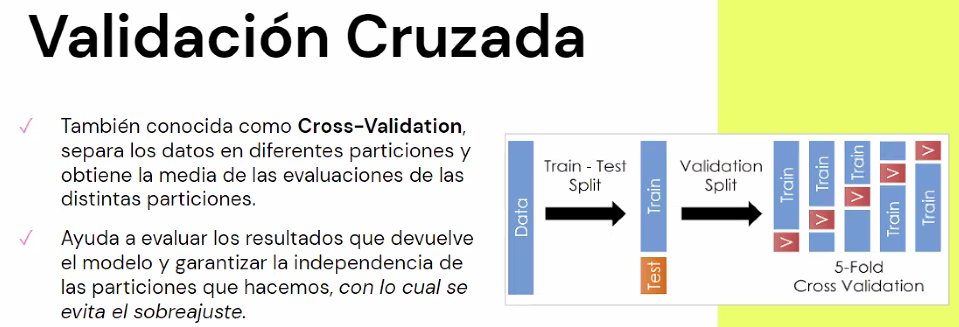

## Overfitting y Underfitting
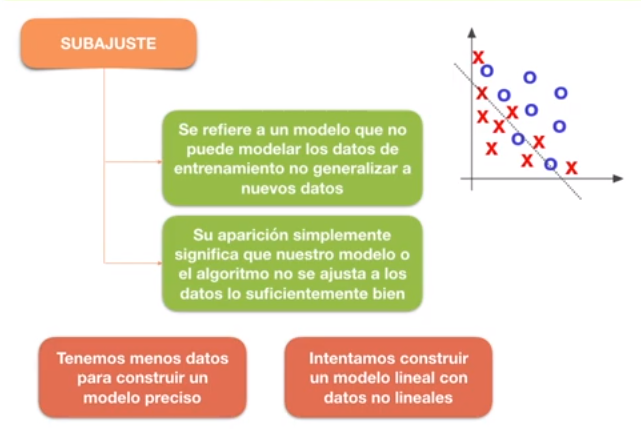
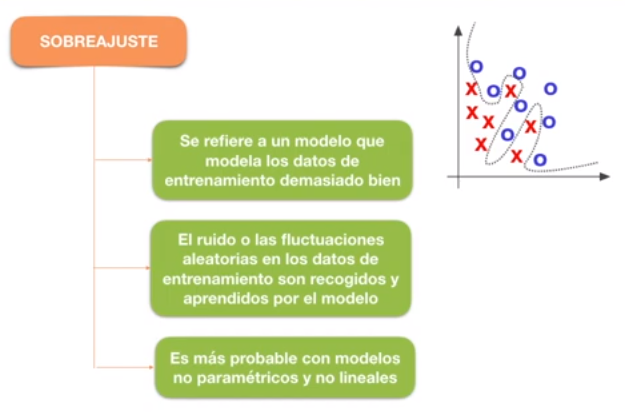

* Las principales causantes de obtener malos resultados en Machine Learning son el Overfitting o el Underfitting de los datos. Dado que cuando entrenamos nuestro modelo intentamos “hacer encajar” -fit en inglés- los datos de entrada entre ellos y con la salida.
* Tanto el Over como el Under – Fitting, se relacionan al fallo de nuestro modelo al generalizar -encajar- el conocimiento que pretendíamos que adquieran.

### Prevenir el overfitting
* Sucede cuando nuestro modelo aprende los datos de train perfectamente, por lo que no es capaz de generalizar y cuando le lleguen nuevos datos obtiene pésimos resultados. 😲
* Existen diferentes formas de prevenir el Overfitting: 
    - Dividir nuestros datos en training, validación y testing.
    - Obtener un mayor número de datos.
    - Ajustar los parámetros de nuestros modelos.
    - Utilizar modelos más simples en caso de ser posible (PARSIMONIA).

### Prevenir el underfitting
* Sucede cuando nuestro modelo no es capaz de identificar patrones. Por lo que tendrá siempre pésimos resultados. 😰
* Existen diferentes formas de prevenir el Underfitting:
    - Tratar los datos correctamente, eliminando outliers y variables innecesarias.
    - Utilizar modelos más complejos.
    - Ajustar los parámetros de nuestros modelos.

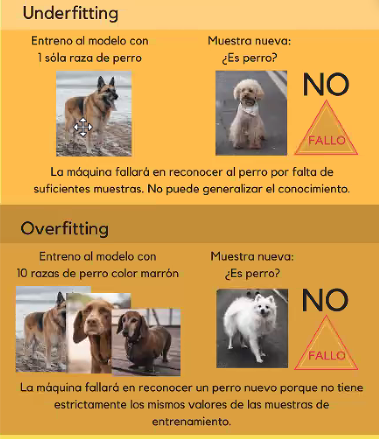

## Métricas y evaluación
### Matríz de confusión
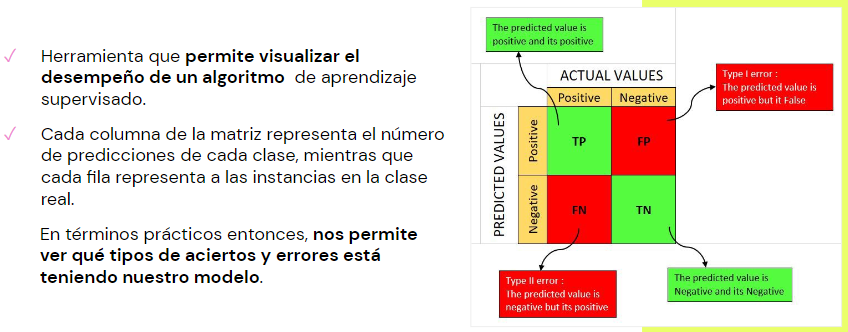

INTERPRETACION:
* **Verdadero Positivo (TP)**: Predije que era positivo y lo era.
* **Verdadero Negativo (TN)**: Predije que era falso y lo era.
* **Falso Positivo (FP)**: Predije que era positivo pero resultó ser negativo.
* **Falso Negativo (FN)**: Predije que era negativo pero resultó siendo positivo.

EJEMPLO TITANIC
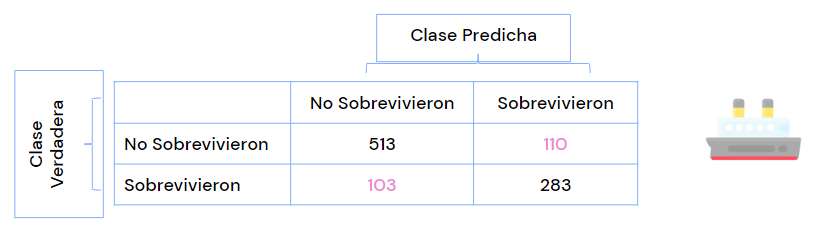

#### Métricas
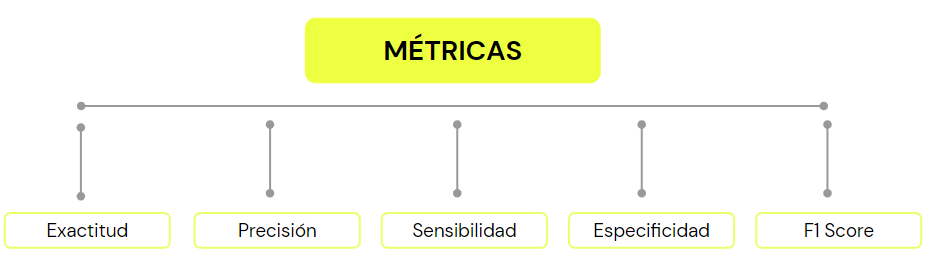

* EXACTITUD o ACCURACY

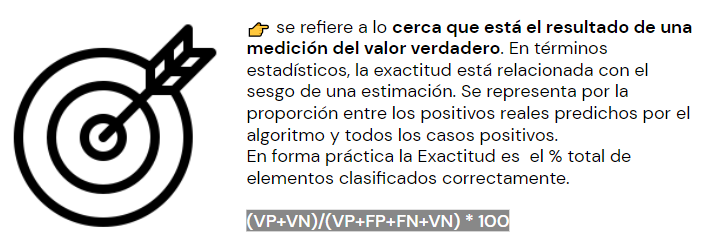

* PRECISION
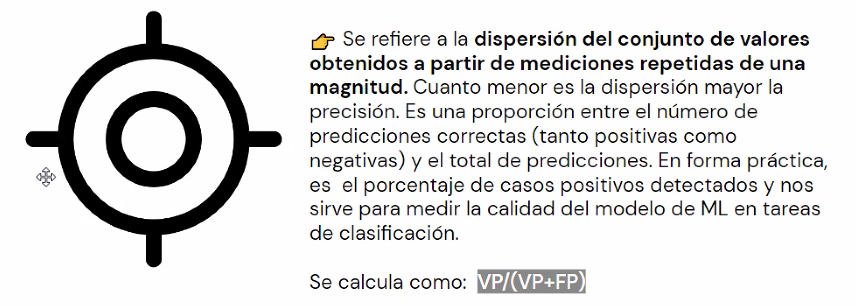

* SENSIBILIDAD o TASA DE VERDADEROS POSITIVOS
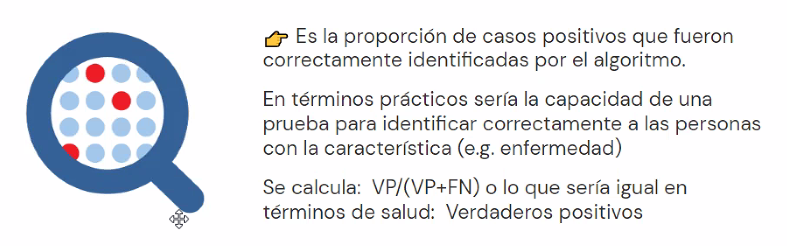

* ESPECIFICIDAD o TASA DE VERDADEROS NEGATIVOS
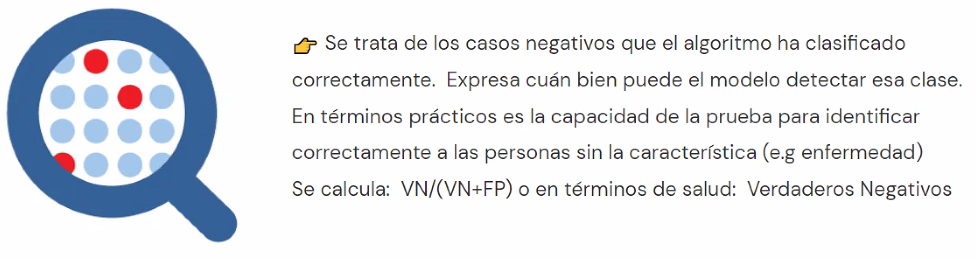

* F1 - Score
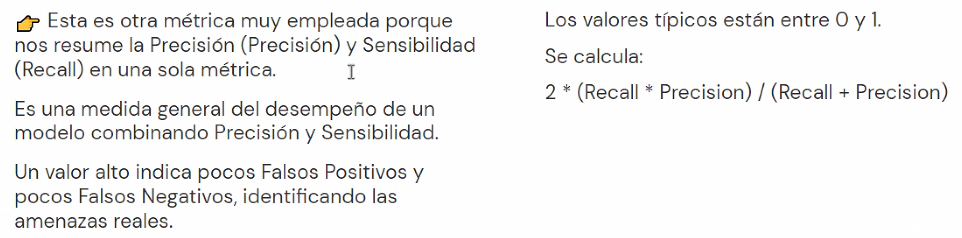
(Media armónica)

## Métricas para Algoritmos de Regresión
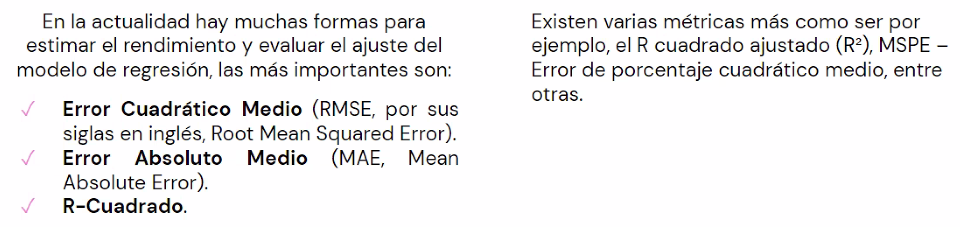

* ERROR CUADRATICO MEDIO (RMSE)
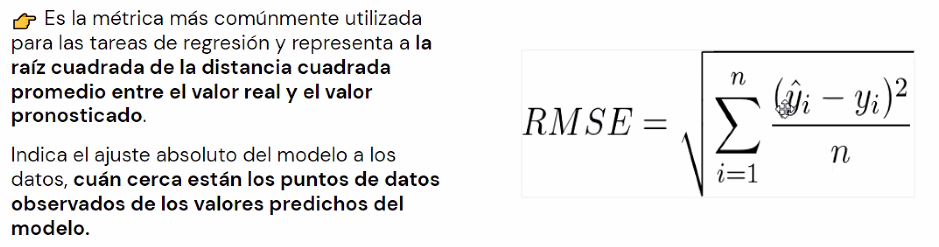

* ERROR ABSOLUTO MEDIO (MAE)
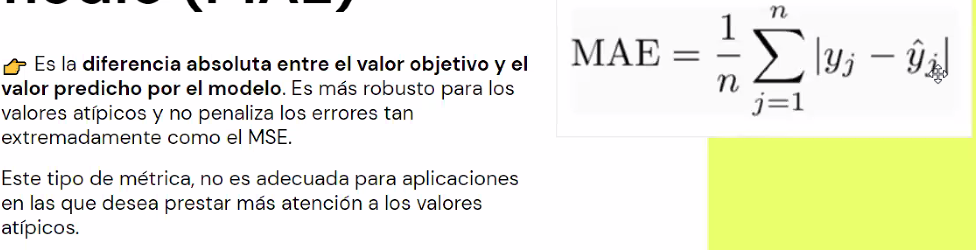

* R2
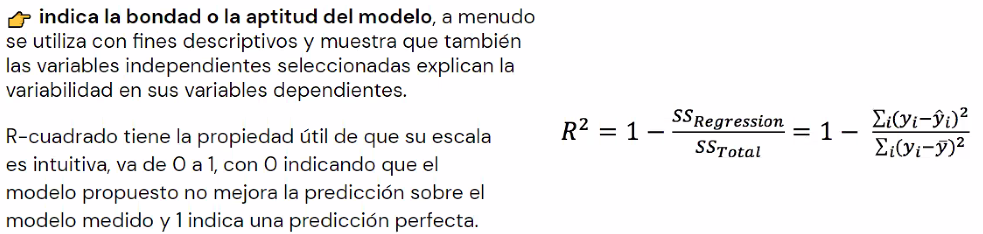

# EJEMPLO

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')

In [10]:
data = load_breast_cancer()

In [13]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [17]:
# predictores del modelo
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# 0: maligno - 1: benigno

In [20]:
# separamos los datos de test y training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 20% test

In [21]:
# creamos modelo
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
print(f'Test: {modelo.score(X_test, y_test)} - Train: {modelo.score(X_train, y_train)}')
# En este caso está sobreajustado (overfitting)
# Un modelo ideal sería entre 0.95 los dos

Test: 0.956140350877193 - Train: 1.0


In [38]:
# creamos predicciones
preds = modelo.predict(X_test)

c:\Users\alk10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

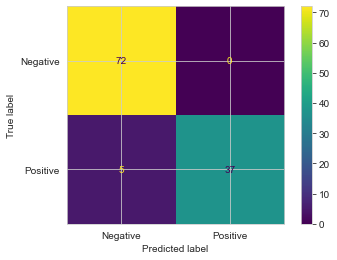

In [34]:
# grafico: matriz de confusion
plt.figure(figsize=(10, 8))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [27]:
metrics.accuracy_score(y_test, preds)

0.956140350877193

Tenemos una exactitud (accuracy) del 95%

In [29]:
metrics.precision_score(y_test, preds, pos_label=0)

0.935064935064935

In [30]:
metrics.precision_score(y_test, preds, pos_label=1)

1.0

Precision del 100% cuando es maligno y del 93% cuando es benigno

In [31]:
metrics.recall_score(y_test, preds, pos_label=0)

1.0

In [32]:
metrics.recall_score(y_test, preds, pos_label=1)

0.8809523809523809

Sensibilidad (Ratio de verdaderos positivos) 100% cuando es maligno y 88% cuando es benigno

In [33]:
# ver todas las metricas
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



VER EJEMPLO DE REGRESION EN Clase19.ipynb